In [1]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年3月30日～2022年4月5日

## 積モデルの実装
TODO
* モデル式 $ T = aXYZ + b $ の実装（Model_InfiniteProductOfProblemSizeMultipliedByProcesses_ForMultipleRegression）
    * ✅テストの実装
    * ✅本実装
* モデル式 $ T = a \frac{YZ}{X} + b $ の実装（Model_InfiniteProductOfProblemSizeDividedByProcesses_ForMultipleRegression）
    * ✅テストの実装
    * ✅本実装
* 上記のモデルにおいてMAPE表を作成する
    * Modelsクラスに追加実装
        * ✅モデル式 $ T = aXYZ + b $
        * ✅モデル式 $ T = a \frac{YZ}{X} + b $
    * 表への追加
        * ✅モデル式 $ T = aXYZ + b $
        * ✅モデル式 $ T = a \frac{YZ}{X} + b $

（T,X,Y,Zはそれぞれ、関数コール回数,プロセス数,問題サイズ1,問題サイズ2）

In [2]:
benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelInfiniteProductOfProblemSizeMultipliedByProcesses": "問題サイズの変数の総乗とプロセス数とをかける",
    "modelInfiniteProductOfProblemSizeDividedByProcesses": "問題サイズの変数の総乗をプロセス数で割る",
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月23日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

df = addLowestMAPEsModelNameColumn(df, version=2, model_name_list=model_names_list_JP)

print(
    df.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}における各モデルでのMAPE",
        label=f"{date}allModelsMAPEin{benchmark_name.upper()}",
    )
)

df.style.format(precision=2).highlight_min(axis=1, subset=model_names_list_JP)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']


/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estima

\begin{table}
\caption{ベンチマークプログラムCGにおける各モデルでのMAPE}
\label{2022年3月23日allModelsMAPEinCG}
\begin{tabular}{lrrrrrrrrrrrrrl}
 & プロセス数を問題サイズで割る & 反比例 & 反比例＆対数 & 反比例＆線形 & 問題サイズの変数の総乗とプロセス数とをかける & 問題サイズの変数の総乗をプロセス数で割る & 問題サイズをプロセス数で割る & 対数 & 対数＆反比例 & 対数＆線形 & 線形 & 線形＆反比例 & 線形＆対数 & 最適モデル \\
関数名 &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
.TAU_application & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
ALLOC_SPACE & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CG & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CONJ_GRAD & 37.55 & 13.88 & 13.73 & 14.50 & 37.69 & 38.04 & 42.76 & 14.80 & 14.72 & 15.25 & 13.16 & 12.41 & 12.76 & 線形＆反比例 \\
ICNVRT & 159.61 & 662.48 & 2504.27 & 894.57 & 93.04 & 89.90 & 119.98 & 2443.70 & 3811.49 & 815.79 & 502.12 & 6621.01 & 2283.06 & 問題サイズの変数の総乗をプロセス数で割る \\
INITIALIZE_MPI & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0

/tmp/ipykernel_12593/4026089130.py:68: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.set_precision(2).to_latex(


,プロセス数を問題サイズで割る,反比例,反比例＆対数,反比例＆線形,問題サイズの変数の総乗とプロセス数とをかける,問題サイズの変数の総乗をプロセス数で割る,問題サイズをプロセス数で割る,対数,対数＆反比例,対数＆線形,線形,線形＆反比例,線形＆対数,最適モデル
関数名,,,,,,,,,,,,,,
.TAU_application,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
ALLOC_SPACE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
CG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
CONJ_GRAD,37.55,13.88,13.73,14.50,37.69,38.04,42.76,14.80,14.72,15.25,13.16,12.41,12.76,線形＆反比例
ICNVRT,159.61,662.48,2504.27,894.57,93.04,89.90,119.98,2443.70,3811.49,815.79,502.12,6621.01,2283.06,問題サイズの変数の総乗をプロセス数で割る
INITIALIZE_MPI,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MAKEA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MPI_Barrier(),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MPI_Bcast(),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形


In [3]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 研究室内発表対策

## 目標

下記のような表を作成する関数を作成

| ベンチマークプログラム名 | 平均絶対誤差 |
|--------------|--------|
| CG           | 33.9   |
| EP           | 0.0    |
| FT           | 47.5   |
| IS           | 59.9   |
| LU           | 1958.4 |
| MG           | 4.8    |
## TODOs

* ✅日常的に結果の表示に使用しているコードを関数化する
    * 引数は次の通り
        * 生データの入ったDF :pandas.DataFrame
        * モデル名のリスト :list[str]
    * ✅ベンチマーク名が複数存在する場合は警告

* ✅上記で関数化したコードの返り値を入力として平均絶対誤差を返す関数
    * 引数は次の通り
        * 上記の関数(`returnMAPEDFFromRawDF`) で返された値(型：pd.DataFrame())

* ✅上記で関数化したコードを使用しつつ目標となる表を作成する関数を作成する
    * 引数は次の通り
        * ベンチマークのリスト :str
        * 問題サイズのリスト :list[str]
        * プロセス数のリスト :list[int]
        * モデル名のリスト :list[str]


In [4]:
benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelInfiniteProductOfProblemSizeMultipliedByProcesses": "問題サイズの変数の総乗とプロセス数とをかける",
    "modelInfiniteProductOfProblemSizeDividedByProcesses": "問題サイズの変数の総乗をプロセス数で割る",
    # "modelBasicTree": "回帰木",
}

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

print(rawDF)


retDF = returnMAPEDFFromRawDF(input_rawDF=rawDF, model_names_list=model_names_list)

retDF = addLowestMAPEsModelNameColumn(
    retDF, version=2, model_name_list=model_names_list
)

date: str = "2022年3月23日"
print(
    retDF.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}における各モデルでのMAPE",
        label=f"{date}allModelsMAPEin{benchmark_name.upper()}",
    )
)

retDF.style.format(precision=2).highlight_min(axis=1, subset=model_names_list)

            functionName  functionCallNum benchmarkName benchmarkClass  \
0       .TAU_application              1.0            cg              A   
1                     CG              1.0            cg              A   
2         MPI_Finalize()              1.0            cg              A   
3         INITIALIZE_MPI              1.0            cg              A   
4             MPI_Init()              1.0            cg              A   
..                   ...              ...           ...            ...   
17          MPI_Reduce()              1.0            cg              F   
18  SETUP_SUBMATRIX_INFO              1.0            cg              F   
19       MPI_Comm_size()              1.0            cg              F   
20       MPI_Comm_rank()              1.0            cg              F   
21       SETUP_PROC_INFO              1.0            cg              F   

    process  intBenchmarkClass        na  nonzer  niter  shift  
0         2                  1     14000      

/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estima

\begin{table}
\caption{ベンチマークプログラムCGにおける各モデルでのMAPE}
\label{2022年3月23日allModelsMAPEinCG}
\begin{tabular}{lrrrrrrrrrrrrrll}
 & modelLin & modelIp & modelLog & modelProcessDividedByProblemSize & modelProblemSizeDividedByProcess & modelInfiniteProductOfProblemSizeDividedByProcesses & modelInfiniteProductOfProblemSizeMultipliedByProcesses & modelLinAndIp & modelLinAndLog & modelIpAndLin & modelIpAndLog & modelLogAndLin & modelLogAndIp & functionName & 最適モデル \\
0 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & SETUP_PROC_INFO & modelLin \\
1 & 13.16 & 13.88 & 14.80 & 37.55 & 42.76 & 38.04 & 37.69 & 12.41 & 12.76 & 14.50 & 13.73 & 15.25 & 14.72 & CONJ_GRAD & modelLinAndIp \\
2 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & .TAU_application & modelLin \\
3 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & MPI_Bcast() & modelLin \\
4 & 198.01 & 336.65 & 1306.98 &

/tmp/ipykernel_12593/410549771.py:45: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  retDF.style.set_precision(2).to_latex(


,modelLin,modelIp,modelLog,modelProcessDividedByProblemSize,modelProblemSizeDividedByProcess,modelInfiniteProductOfProblemSizeDividedByProcesses,modelInfiniteProductOfProblemSizeMultipliedByProcesses,modelLinAndIp,modelLinAndLog,modelIpAndLin,modelIpAndLog,modelLogAndLin,modelLogAndIp,functionName,最適モデル
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,SETUP_PROC_INFO,modelLin
1,13.16,13.88,14.80,37.55,42.76,38.04,37.69,12.41,12.76,14.50,13.73,15.25,14.72,CONJ_GRAD,modelLinAndIp
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,.TAU_application,modelLin
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,MPI_Bcast(),modelLin
4,198.01,336.65,1306.98,153.54,182.72,88.50,92.02,2573.96,1221.60,345.74,1321.90,338.95,1503.10,SPRNVC,modelInfiniteProductOfProblemSizeDividedByProcesses
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,MPI_Finalize(),modelLin
6,198.01,336.65,1306.98,153.54,182.72,88.50,92.02,2573.96,1221.60,345.74,1321.90,338.95,1503.10,VECSET,modelInfiniteProductOfProblemSizeDividedByProcesses
7,502.12,662.48,2443.70,159.61,119.98,89.90,93.04,6621.01,2283.06,894.57,2504.27,815.79,3811.49,ICNVRT,modelInfiniteProductOfProblemSizeDividedByProcesses
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,MPI_Comm_size(),modelLin
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,MPI_Comm_rank(),modelLin


In [5]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


In [6]:
warnings.simplefilter("ignore")

# table_1 -> 線形モデル・反比例モデル・対数モデル
# table_2 -> {table_1}のモデル・組み合わせモデル
# table_3 -> {table_2}のモデル・「問題サイズ/プロセス数」モデル・「プロセス数/問題サイズ」モデル
# table_4 -> {table_3}のモデル・「問題サイズの総乗 * プロセス数」モデル・「問題サイズの総乗 / プロセス数」モデル

date: str = "2022年4月15日"

latex_table: str = (
    returnAverageMAPEfromConditions(
        list_benchmarkNames=[
            "cg",
            "ep",
            # "ft",
            "is",
            # "lu",
            "mg",
        ],
        list_problemSizes=["A", "B", "C", "D", "E", "F"],
        list_processes=[2, 4, 8, 16, 32, 64, 128, 256],
        list_modelNames=[
            "functionName",
            "modelLin",
            "modelIp",
            "modelLog",
            "modelLinAndIp",
            "modelLinAndLog",
            "modelIpAndLin",
            "modelIpAndLog",
            "modelLogAndLin",
            "modelLogAndIp",
            "modelProcessDividedByProblemSize",
            "modelProblemSizeDividedByProcess",
            "modelInfiniteProductOfProblemSizeMultipliedByProcesses",
            "modelInfiniteProductOfProblemSizeDividedByProcesses",
        ],
    )
    .style.set_precision(2)
    .to_latex(
        caption=f"平均MAPE_table4",
        label=f"{date}allModelsMAPE",
    )
)

print(latex_table)

latex_table: str = (
    returnAverageMAPEfromConditions(
        list_benchmarkNames=[
            "cg",
            "ep",
            # "ft",
            "is",
            # "lu",
            "mg",
        ],
        list_problemSizes=["A", "B", "C", "D", "E", "F"],
        list_processes=[2, 4, 8, 16, 32, 64, 128, 256],
        list_modelNames=[
            "functionName",
            "modelLin",
            "modelIp",
            "modelLog",
            "modelLinAndIp",
            "modelLinAndLog",
            "modelIpAndLin",
            "modelIpAndLog",
            "modelLogAndLin",
            "modelLogAndIp",
            "modelProcessDividedByProblemSize",
            "modelProblemSizeDividedByProcess",
            # "modelInfiniteProductOfProblemSizeMultipliedByProcesses",
            # "modelInfiniteProductOfProblemSizeDividedByProcesses"
        ],
    )
    .style.set_precision(2)
    .to_latex(
        caption=f"平均MAPE_table3",
        label=f"{date}allModelsMAPE",
    )
)

print(latex_table)

latex_table: str = (
    returnAverageMAPEfromConditions(
        list_benchmarkNames=[
            "cg",
            "ep",
            # "ft",
            "is",
            # "lu",
            "mg",
        ],
        list_problemSizes=["A", "B", "C", "D", "E", "F"],
        list_processes=[2, 4, 8, 16, 32, 64, 128, 256],
        list_modelNames=[
            "functionName",
            "modelLin",
            "modelIp",
            "modelLog",
            "modelLinAndIp",
            "modelLinAndLog",
            "modelIpAndLin",
            "modelIpAndLog",
            "modelLogAndLin",
            "modelLogAndIp",
            # "modelProcessDividedByProblemSize",
            # "modelProblemSizeDividedByProcess",
            # "modelInfiniteProductOfProblemSizeMultipliedByProcesses",
            # "modelInfiniteProductOfProblemSizeDividedByProcesses"
        ],
    )
    .style.set_precision(2)
    .to_latex(
        caption=f"平均MAPE_table2",
        label=f"{date}allModelsMAPE",
    )
)

print(latex_table)

latex_table: str = (
    returnAverageMAPEfromConditions(
        list_benchmarkNames=[
            "cg",
            "ep",
            # "ft",
            "is",
            # "lu",
            "mg",
        ],
        list_problemSizes=["A", "B", "C", "D", "E", "F"],
        list_processes=[2, 4, 8, 16, 32, 64, 128, 256],
        list_modelNames=[
            "functionName",
            "modelLin",
            "modelIp",
            "modelLog",
            # "modelLinAndIp",
            # "modelLinAndLog",
            # "modelIpAndLin",
            # "modelIpAndLog",
            # "modelLogAndLin",
            # "modelLogAndIp",
            # "modelProcessDividedByProblemSize",
            # "modelProblemSizeDividedByProcess",
            # "modelInfiniteProductOfProblemSizeMultipliedByProcesses",
            # "modelInfiniteProductOfProblemSizeDividedByProcesses"
        ],
    )
    .style.set_precision(2)
    .to_latex(
        caption=f"平均MAPE_table1",
        label=f"{date}allModelsMAPE",
    )
)

print(latex_table)

warnings.resetwarnings()

\begin{table}
\caption{平均MAPE_table4}
\label{2022年4月15日allModelsMAPE}
\begin{tabular}{llr}
 & benchmarkName & averageMAPE \\
0 & cg & 17.47 \\
1 & ep & 0.00 \\
2 & is & 5.07 \\
3 & mg & 4.66 \\
\end{tabular}
\end{table}

\begin{table}
\caption{平均MAPE_table3}
\label{2022年4月15日allModelsMAPE}
\begin{tabular}{llr}
 & benchmarkName & averageMAPE \\
0 & cg & 24.75 \\
1 & ep & 0.00 \\
2 & is & 5.07 \\
3 & mg & 4.88 \\
\end{tabular}
\end{table}

\begin{table}
\caption{平均MAPE_table2}
\label{2022年4月15日allModelsMAPE}
\begin{tabular}{llr}
 & benchmarkName & averageMAPE \\
0 & cg & 46.16 \\
1 & ep & 0.00 \\
2 & is & 177.00 \\
3 & mg & 4.88 \\
\end{tabular}
\end{table}

\begin{table}
\caption{平均MAPE_table1}
\label{2022年4月15日allModelsMAPE}
\begin{tabular}{llr}
 & benchmarkName & averageMAPE \\
0 & cg & 46.19 \\
1 & ep & 0.00 \\
2 & is & 424.42 \\
3 & mg & 4.99 \\
\end{tabular}
\end{table}



In [7]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 新たなモデルの実装

下記のモデル式を実現するモデルを実装する

$$
T = aXY + bXZ + cYZ + d
$$

T,X,Y,Z はそれぞれ関数コール回数・プロセス数・問題サイズ1・問題サイズ2
a,b,c は係数、dは切片

# TODOs

* ✅テストの作成
* ✅列名のリストにおいてモデル構築に必要な列の組み合わせを作成
* ✅実装


In [8]:
exp_names: list[str] = ["plot1", "plot2", "plot3", "plot4", "plot5"]
combinations_exp_name = list(itertools.combinations(exp_names, 2))
combinations_exp_name

[('plot1', 'plot2'),
 ('plot1', 'plot3'),
 ('plot1', 'plot4'),
 ('plot1', 'plot5'),
 ('plot2', 'plot3'),
 ('plot2', 'plot4'),
 ('plot2', 'plot5'),
 ('plot3', 'plot4'),
 ('plot3', 'plot5'),
 ('plot4', 'plot5')]

In [9]:
test_Model_LinearSumOf2elementCombination_ForMultipleRegression()

In [10]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年4月17日

## モデル$ T = aXY + bXZ + cYZ + d $に関する実装
TODO
* モデル式 $ T = aXY + bXZ + cYZ + d $ においてMAPE表を作成する（Model_InfiniteProductOfProblemSizeMultipliedByProcesses_ForMultipleRegression）
    * Modelsクラスに追加実装
        * ✅`__init__()`
        * ✅`setUpDataBeforeCalcLr()`
        * ✅`calcLr()`
        * ✅`calcMAPE()`
        * ✅`returnCalculatedMAPE()`
        * ✅`returnRelativeErrorRate()`
        * ✅`updateFunctionAndBenchmarkName()`
    * 表への追加

（T,X,Y,Zはそれぞれ、関数コール回数,プロセス数,問題サイズ1,問題サイズ2）
（a,b,cは係数, dは切片）

In [11]:
warnings.simplefilter("ignore")

benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelInfiniteProductOfProblemSizeMultipliedByProcesses": "問題サイズの変数の総乗とプロセス数とをかける",
    "modelInfiniteProductOfProblemSizeDividedByProcesses": "問題サイズの変数の総乗をプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月23日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

df = addLowestMAPEsModelNameColumn(df, version=2, model_name_list=model_names_list_JP)

print(
    df.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}における各モデルでのMAPE",
        label=f"{date}allModelsMAPEin{benchmark_name.upper()}",
    )
)


warnings.resetwarnings()

df.style.format(precision=2).highlight_min(axis=1, subset=model_names_list_JP)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']
\begin{table}
\caption{ベンチマークプログラムCGにおける各モデルでのMAPE}
\label{2022年3月23日allModelsMAPEinCG}
\begin{tabular}{lrrrrrrrrrrrrrrl}
 & プロセス数を問題サイズで割る & 反比例 & 反比例＆対数 & 反比例＆線形 & 問題サイズの変数の総乗とプロセス数とをかける & 問題サイズの変数の総乗をプロセス数で割る & 問題サイズをプロセス数で割る & 対数 & 対数＆反比例 & 対数＆線形 & 線形 & 線形＆反比例 & 線形＆対数 & 説明変数の要素の組み合わせの積の総和 & 最適モデル \\
関数名 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
.TAU_application & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
ALLOC_SPACE & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CG & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CONJ_GRAD & 37.55 & 13.88 & 13.73 & 14.50 & 37.69 & 38.04 & 42.76 & 14.80 & 14.72 & 15.25 & 13.16 & 12.41 & 12.76 & 9.67 & 説明変数の要素の組み合わせの積の総和 \\
ICNVRT & 159.61 & 662.48 & 2504.27 & 894.57 & 93.04 & 89.90 & 119.98 & 2443.70 & 3811.49 & 8

,プロセス数を問題サイズで割る,反比例,反比例＆対数,反比例＆線形,問題サイズの変数の総乗とプロセス数とをかける,問題サイズの変数の総乗をプロセス数で割る,問題サイズをプロセス数で割る,対数,対数＆反比例,対数＆線形,線形,線形＆反比例,線形＆対数,説明変数の要素の組み合わせの積の総和,最適モデル
関数名,,,,,,,,,,,,,,,
.TAU_application,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
ALLOC_SPACE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
CG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
CONJ_GRAD,37.55,13.88,13.73,14.50,37.69,38.04,42.76,14.80,14.72,15.25,13.16,12.41,12.76,9.67,説明変数の要素の組み合わせの積の総和
ICNVRT,159.61,662.48,2504.27,894.57,93.04,89.90,119.98,2443.70,3811.49,815.79,502.12,6621.01,2283.06,84.75,説明変数の要素の組み合わせの積の総和
INITIALIZE_MPI,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MAKEA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MPI_Barrier(),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MPI_Bcast(),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形


In [12]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年4月26日

## 手動で新モデルの比較結果を出す



In [13]:
benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月30日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

df = addLowestMAPEsModelNameColumn(df, version=2, model_name_list=model_names_list_JP)

print(
    df.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}における各モデルでのMAPE",
        label=f"{date}allModelsMAPEin{benchmark_name.upper()}",
    )
)

df.style.format(precision=2).highlight_min(axis=1, subset=model_names_list_JP)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']


/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estima

\begin{table}
\caption{ベンチマークプログラムCGにおける各モデルでのMAPE}
\label{2022年3月30日allModelsMAPEinCG}
\begin{tabular}{lrrrrrrrrrrrrl}
 & プロセス数を問題サイズで割る & 反比例 & 反比例＆対数 & 反比例＆線形 & 問題サイズをプロセス数で割る & 対数 & 対数＆反比例 & 対数＆線形 & 線形 & 線形＆反比例 & 線形＆対数 & 説明変数の要素の組み合わせの積の総和 & 最適モデル \\
関数名 &  &  &  &  &  &  &  &  &  &  &  &  &  \\
.TAU_application & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
ALLOC_SPACE & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CG & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CONJ_GRAD & 37.55 & 13.88 & 13.73 & 14.50 & 42.76 & 14.80 & 14.72 & 15.25 & 13.16 & 12.41 & 12.76 & 9.67 & 説明変数の要素の組み合わせの積の総和 \\
ICNVRT & 159.61 & 662.48 & 2504.27 & 894.57 & 119.98 & 2443.70 & 3811.49 & 815.79 & 502.12 & 6621.01 & 2283.06 & 84.75 & 説明変数の要素の組み合わせの積の総和 \\
INITIALIZE_MPI & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
MAKEA & 0.00

/tmp/ipykernel_12593/2241792080.py:67: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.set_precision(2).to_latex(


,プロセス数を問題サイズで割る,反比例,反比例＆対数,反比例＆線形,問題サイズをプロセス数で割る,対数,対数＆反比例,対数＆線形,線形,線形＆反比例,線形＆対数,説明変数の要素の組み合わせの積の総和,最適モデル
関数名,,,,,,,,,,,,,
.TAU_application,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
ALLOC_SPACE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
CG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
CONJ_GRAD,37.55,13.88,13.73,14.50,42.76,14.80,14.72,15.25,13.16,12.41,12.76,9.67,説明変数の要素の組み合わせの積の総和
ICNVRT,159.61,662.48,2504.27,894.57,119.98,2443.70,3811.49,815.79,502.12,6621.01,2283.06,84.75,説明変数の要素の組み合わせの積の総和
INITIALIZE_MPI,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MAKEA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MPI_Barrier(),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形
MPI_Bcast(),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,線形


# 2022年4月23日～2022年4月27日

✅次のような入力に対する返値を返す関数を作成する

## 入力

* 入力DF１

| 関数名(index) | ... | 最適モデル  |
|-----|-----|--------|
| A() | ... | model1 |
| B() | ... | model1 |
| C() | ... | model1 |

* 入力DF２

| 関数名(index) | ... | 最適モデル  |
|-----|-----|--------|
| A() | ... | model1 |
| B() | ... | model2 |
| C() | ... | model1 |

## 出力

* 返値DF

| 関数名(index) | model1      | model2      |
|-----|-------------|-------------|
| B() | mape@model1 | mape@model2 |

## 実装予定

* ✅テストの実装
1. 最低MAPEを付与したDFを２個作成する
2. 関数名と最適モデルで構成された２個のDFのdiff をとる
3. diff の生まれた箇所を取り出す
4. くっつける
5. 返す

* ✅本実装

1. inputDF_2 のカラム数 > inputDF_1 のカラム数 を満たすことを確認
2. 「inputDF_2 のカラム名」が「inputDF_1 のカラム名」のすべてを包含していることを確認
3. inputDF_1, inputDF_2 の最適モデル名のsetを作成
4. 最適モデル名setの要素以外をすべてinputDF_2から削除して返す

### その他

* 以前にも同様の表を作成したことがあるので、それと同様の条件で実施して、動作に不備がないかを確認する


In [14]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年4月27日～2022年4月28日

ベンチマークプログラムCGにおいて精度の低い関数をリストアップする。

| 関数名 | 最適モデル名 | MAPE |
|-----|--------|------|
|     |        |      |

### TODOs

1. ✅MAPEの大きい順にソートする
2. ✅表形式に整える


In [15]:
benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年4月27日"

# コア数と問題サイズの両方を振る
rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    mapeDF_EN: pd.DataFrame = returnMAPEDFFromRawDF(
        input_rawDF=rawDF, model_names_list=model_names_list
    )
mapeDF_JP: pd.DataFrame = mapeDF_EN.rename(columns=dict_column_names_JP)
mapeDF_JP = mapeDF_JP.set_index("関数名")

resultDF: pd.DataFrame = addLowestMAPEColumn(
    inputDF=mapeDF_JP, model_name_list=model_names_list_JP, version=2
)
resultDF = addLowestMAPEsModelNameColumn(
    inputDF=resultDF, model_name_list=model_names_list_JP, version=2
)

list_drop_column_names: list[str] = resultDF.columns.tolist()
list_drop_column_names.remove("最適モデル")
list_drop_column_names.remove("最低値")

resultDF = resultDF.drop(columns=list_drop_column_names).sort_values(
    "最低値", ascending=False
)
resultDF = resultDF[resultDF["最低値"] > 1]

print(
    resultDF.style.format(precision=2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}における最低MAPEが1より大きい関数",
        label=f"{date}_MAPEover1_functions_{benchmark_name.upper()}",
    )
)

\begin{table}
\caption{ベンチマークプログラムCGにおける最低MAPEが1より大きい関数}
\label{2022年4月27日_MAPEover1_functions_CG}
\begin{tabular}{lrl}
 & 最低値 & 最適モデル \\
関数名 &  &  \\
ICNVRT & 84.75 & 説明変数の要素の組み合わせの積の総和 \\
SPRNVC & 62.48 & 説明変数の要素の組み合わせの積の総和 \\
VECSET & 62.48 & 説明変数の要素の組み合わせの積の総和 \\
MPI_Irecv() & 22.27 & 説明変数の要素の組み合わせの積の総和 \\
MPI_Wait() & 22.27 & 説明変数の要素の組み合わせの積の総和 \\
MPI_Send() & 22.27 & 説明変数の要素の組み合わせの積の総和 \\
CONJ_GRAD & 9.67 & 説明変数の要素の組み合わせの積の総和 \\
\end{tabular}
\end{table}



In [16]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


In [17]:
warnings.simplefilter("ignore")

benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    # "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月30日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

dfBefore = addLowestMAPEsModelNameColumn(
    df, version=2, model_name_list=model_names_list_JP
)

benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月30日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

dfAfter = addLowestMAPEsModelNameColumn(
    df, version=2, model_name_list=model_names_list_JP
)


df = returnDFaboutDifferenceBetweenInput2DFs(dfBefore, dfAfter)
model_names_list: list[str] = df.columns.tolist()

addLowestMAPEsModelNameColumn(df, model_names_list, version=2)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']
exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']


,プロセス数を問題サイズで割る,問題サイズをプロセス数で割る,線形,線形＆反比例,説明変数の要素の組み合わせの積の総和,最適モデル
関数名,,,,,,
CONJ_GRAD,37.550135,42.757190,13.161174,12.412559,9.666397,説明変数の要素の組み合わせの積の総和
ICNVRT,159.614199,119.984610,502.123230,6621.011052,84.751964,説明変数の要素の組み合わせの積の総和
MPI_Irecv(),208.955855,56.476064,34.989183,35.515528,22.272503,説明変数の要素の組み合わせの積の総和
MPI_Send(),208.955855,56.476064,34.989183,35.515528,22.272503,説明変数の要素の組み合わせの積の総和
MPI_Wait(),208.955855,56.476064,34.989183,35.515528,22.272503,説明変数の要素の組み合わせの積の総和
SPRNVC,153.544935,182.716358,198.005854,2573.964383,62.480987,説明変数の要素の組み合わせの積の総和
VECSET,153.544935,182.716358,198.005854,2573.964383,62.480987,説明変数の要素の組み合わせの積の総和


In [18]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年5月7日～2022年5月8日

## 新モデルの結果の取得

1. すべてのモデルでのMAPEを保持した表を作成
2. 打ち負かしたモデルのMAPEと打ち負かしたモデルのMAPEを保持した表を作成


In [19]:
test_returnDFaboutDifferenceBetweenInput2DFs()

warnings.simplefilter("ignore")

benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    # "modelLinearSumOfElementCombinations": "説明変数の要素の全組み合わせの積の線形和"
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月30日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

dfBefore = addLowestMAPEsModelNameColumn(
    df, version=2, model_name_list=model_names_list_JP
)

benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    "modelLinearSumOfElementCombinations": "説明変数の要素の全組み合わせの積の線形和"
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月30日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

dfAfter = addLowestMAPEsModelNameColumn(
    df, version=2, model_name_list=model_names_list_JP
)


df = returnDFaboutDifferenceBetweenInput2DFs(dfBefore, dfAfter)
model_names_list: list[str] = df.columns.tolist()

result: pd.DataFrame = addLowestMAPEsModelNameColumn(df, model_names_list, version=2)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']
exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']


In [20]:
print(
    dfAfter.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}の関数におけるすべてのモデルのMAPE",
        label=f"{date}allModelsMAPEin{benchmark_name.upper()}",
    )
)

dfAfter

\begin{table}
\caption{ベンチマークプログラムCGの関数におけるすべてのモデルのMAPE}
\label{2022年3月30日allModelsMAPEinCG}
\begin{tabular}{lrrrrrrrrrrrrrl}
 & プロセス数を問題サイズで割る & 反比例 & 反比例＆対数 & 反比例＆線形 & 問題サイズをプロセス数で割る & 対数 & 対数＆反比例 & 対数＆線形 & 線形 & 線形＆反比例 & 線形＆対数 & 説明変数の要素の全組み合わせの積の線形和 & 説明変数の要素の組み合わせの積の総和 & 最適モデル \\
関数名 &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
.TAU_application & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
ALLOC_SPACE & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CG & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CONJ_GRAD & 37.55 & 13.88 & 13.73 & 14.50 & 42.76 & 14.80 & 14.72 & 15.25 & 13.16 & 12.41 & 12.76 & 2.78 & 9.67 & 説明変数の要素の全組み合わせの積の線形和 \\
ICNVRT & 159.61 & 662.48 & 2504.27 & 894.57 & 119.98 & 2443.70 & 3811.49 & 815.79 & 502.12 & 6621.01 & 2283.06 & 35.33 & 84.75 & 説明変数の要素の全組み合わせの積の線形和 \\
INITIALIZE_MPI & 0.00 & 0.00 & 0.00 & 0.00 & 0.

,プロセス数を問題サイズで割る,反比例,反比例＆対数,反比例＆線形,問題サイズをプロセス数で割る,対数,対数＆反比例,対数＆線形,線形,線形＆反比例,線形＆対数,説明変数の要素の全組み合わせの積の線形和,説明変数の要素の組み合わせの積の総和,最適モデル
関数名,,,,,,,,,,,,,,
.TAU_application,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
ALLOC_SPACE,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
CG,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
CONJ_GRAD,3.755014e+01,13.876670,13.732936,14.498431,4.275719e+01,14.804389,14.717362,15.248570,13.161174,12.412559,12.755412,2.782334,9.666397,説明変数の要素の全組み合わせの積の線形和
ICNVRT,1.596142e+02,662.481358,2504.274677,894.574028,1.199846e+02,2443.699386,3811.490854,815.789372,502.123230,6621.011052,2283.060136,35.331868,84.751964,説明変数の要素の全組み合わせの積の線形和
INITIALIZE_MPI,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
MAKEA,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
MPI_Barrier(),7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
MPI_Bcast(),7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形


In [21]:
print(
    result.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}において新しく実装したモデルが最適モデルとなった関数のMAPE",
        label=f"{date}bestModelsMAPEin{benchmark_name.upper()}",
    )
)

result

\begin{table}
\caption{ベンチマークプログラムCGにおいて新しく実装したモデルが最適モデルとなった関数のMAPE}
\label{2022年3月30日bestModelsMAPEinCG}
\begin{tabular}{lrrl}
 & 説明変数の要素の全組み合わせの積の線形和 & 説明変数の要素の組み合わせの積の総和 & 最適モデル \\
関数名 &  &  &  \\
CONJ_GRAD & 2.78 & 9.67 & 説明変数の要素の全組み合わせの積の線形和 \\
ICNVRT & 35.33 & 84.75 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Irecv() & 14.81 & 22.27 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Send() & 14.81 & 22.27 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Wait() & 14.81 & 22.27 & 説明変数の要素の全組み合わせの積の線形和 \\
SPRNVC & 31.22 & 62.48 & 説明変数の要素の全組み合わせの積の線形和 \\
VECSET & 31.22 & 62.48 & 説明変数の要素の全組み合わせの積の線形和 \\
\end{tabular}
\end{table}



,説明変数の要素の全組み合わせの積の線形和,説明変数の要素の組み合わせの積の総和,最適モデル
関数名,,,
CONJ_GRAD,2.782334,9.666397,説明変数の要素の全組み合わせの積の線形和
ICNVRT,35.331868,84.751964,説明変数の要素の全組み合わせの積の線形和
MPI_Irecv(),14.812929,22.272503,説明変数の要素の全組み合わせの積の線形和
MPI_Send(),14.812929,22.272503,説明変数の要素の全組み合わせの積の線形和
MPI_Wait(),14.812929,22.272503,説明変数の要素の全組み合わせの積の線形和
SPRNVC,31.218347,62.480987,説明変数の要素の全組み合わせの積の線形和
VECSET,31.218347,62.480987,説明変数の要素の全組み合わせの積の線形和


In [22]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年5月9日

最低MAPEが1より大きい関数をまとめた表を作成する

| 関数名 | 最適モデル名 | MAPE |
|-----|--------|------|
|     |        |      |

👆こんな感じ


In [23]:
benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    "modelLinearSumOfElementCombinations": "説明変数の要素の全組み合わせの積の線形和"
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月30日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    mapeDF_EN: pd.DataFrame = returnMAPEDFFromRawDF(
        input_rawDF=rawDF, model_names_list=model_names_list
    )
mapeDF_JP: pd.DataFrame = mapeDF_EN.rename(columns=dict_column_names_JP)
mapeDF_JP = mapeDF_JP.set_index("関数名")

resultDF: pd.DataFrame = addLowestMAPEColumn(
    inputDF=mapeDF_JP, model_name_list=model_names_list_JP, version=2
)
resultDF = addLowestMAPEsModelNameColumn(
    inputDF=resultDF, model_name_list=model_names_list_JP, version=2
)

list_drop_column_names: list[str] = resultDF.columns.tolist()
list_drop_column_names.remove("最適モデル")
list_drop_column_names.remove("最低値")

resultDF = resultDF.drop(columns=list_drop_column_names).sort_values(
    "最低値", ascending=False
)
resultDF = resultDF[resultDF["最低値"] > 1]

print(
    resultDF.style.format(precision=2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}における最低MAPEが1より大きい関数",
        label=f"{date}_MAPEover1_functions_{benchmark_name.upper()}",
    )
)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']
\begin{table}
\caption{ベンチマークプログラムCGにおける最低MAPEが1より大きい関数}
\label{2022年3月30日_MAPEover1_functions_CG}
\begin{tabular}{lrl}
 & 最低値 & 最適モデル \\
関数名 &  &  \\
ICNVRT & 35.33 & 説明変数の要素の全組み合わせの積の線形和 \\
SPRNVC & 31.22 & 説明変数の要素の全組み合わせの積の線形和 \\
VECSET & 31.22 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Irecv() & 14.81 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Wait() & 14.81 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Send() & 14.81 & 説明変数の要素の全組み合わせの積の線形和 \\
CONJ_GRAD & 2.78 & 説明変数の要素の全組み合わせの積の線形和 \\
\end{tabular}
\end{table}



In [24]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年5月17日～

## モデルの改善

既存モデルの実装に問題があった。改善後の処理フローはREADMEに記載済み

実装手順
1. ✅テストの再実装
2. 本実装
    1. ✅入力の「プロセス数」を「プロセス数の逆数」にする処理
    2. ✅「モデル構築用集合1の生成」処理
    3. ✅「モデル構築用集合2の生成」処理
    4. ✅モデル構築用集合の生成（モデル構築用集合1とモデル構築用集合2の和集合をとる）
    5. ✅モデル構築用集合からモデルを構築


In [25]:
list_v1: list[list[str]] = [
    ["aaa", "bbb", "ccc"],
    ["aa", "bb", "cc"],
    ["a", "b", "c"],
    ["aa", "bb"],
    ["aa", "cc"],
    ["bb", "cc"],
    ["a"],
    ["b"],
    ["c"],
]
print(sorted(list_v1))

list_v2: list[list[str]] = [
    ["a"],
    ["b"],
    ["c"],
    ["aa", "bb"],
    ["aa", "cc"],
    ["bb", "cc"],
    ["aaa", "bbb", "ccc"],
    ["aa", "bb", "cc"],
    ["a", "b", "c"],
]
print(sorted(list_v2))

list_v3: list[list[str]] = [
    ["a"],
    ["aa", "cc"],
    ["aaa", "bbb", "ccc"],
    ["aa", "bb"],
    ["bb", "cc"],
    ["aa", "bb", "cc"],
    ["b"],
    ["c"],
    ["a", "b", "c"],
]
print(sorted(list_v3))

[['a'], ['a', 'b', 'c'], ['aa', 'bb'], ['aa', 'bb', 'cc'], ['aa', 'cc'], ['aaa', 'bbb', 'ccc'], ['b'], ['bb', 'cc'], ['c']]
[['a'], ['a', 'b', 'c'], ['aa', 'bb'], ['aa', 'bb', 'cc'], ['aa', 'cc'], ['aaa', 'bbb', 'ccc'], ['b'], ['bb', 'cc'], ['c']]
[['a'], ['a', 'b', 'c'], ['aa', 'bb'], ['aa', 'bb', 'cc'], ['aa', 'cc'], ['aaa', 'bbb', 'ccc'], ['b'], ['bb', 'cc'], ['c']]


In [26]:
test_Model_LinearSumOfElementCombinations_ForMultipleRegression()

In [27]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年5月20日～

## 修正したモデルのMAPE表を作成

* ✅MAPE表の作成
* ✅修正済みモデルの追加前後で変化した関数の表
* 数値の右詰め

In [28]:
test_returnDFaboutDifferenceBetweenInput2DFs()

warnings.simplefilter("ignore")

benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    # "modelLinearSumOfElementCombinations": "説明変数の要素の全組み合わせの積の線形和"
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年5月25日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

dfBefore = addLowestMAPEsModelNameColumn(
    df, version=2, model_name_list=model_names_list_JP
)

benchmark_name: str = "cg"

classes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]

dict_column_names_JP: dict[str, str] = {
    "functionName": "関数名",
    "modelLin": "線形",
    "modelIp": "反比例",
    "modelLog": "対数",
    "modelLinAndIp": "線形＆反比例",
    "modelLinAndLog": "線形＆対数",
    "modelIpAndLin": "反比例＆線形",
    "modelIpAndLog": "反比例＆対数",
    "modelLogAndLin": "対数＆線形",
    "modelLogAndIp": "対数＆反比例",
    "modelProcessDividedByProblemSize": "プロセス数を問題サイズで割る",
    "modelProblemSizeDividedByProcess": "問題サイズをプロセス数で割る",
    "modelLinearSumOf2elementCombination": "説明変数の要素の組み合わせの積の総和",
    "modelLinearSumOfElementCombinations": "説明変数の要素の全組み合わせの積の線形和"
    # "modelBasicTree": "回帰木",
}

model_names_list_JP: list[str] = list(dict_column_names_JP.values())
model_names_list_JP.remove("関数名")

model_names_list: list[str] = list(dict_column_names_JP.keys())
model_names_list.remove("functionName")

date: str = "2022年3月30日"

# コア数と問題サイズの両方を振る

rawDF: pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmark_name,
    classes=classes,
    processes=processes,
    csv_dir_path="./csv_files/",
)

exp_var: list[str] = rawDF.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    exp_var.remove(element_be_removed)
res_var: list[str] = ["functionCallNum"]

print(f"exp_var = {exp_var}")

returned_MAPE_table: pd.DataFrame = return_MAPE_Table_DF_from_rawDF(
    rawDF=rawDF,
    exp_var_list=exp_var,
    res_var_list=res_var,
    model_name_list=model_names_list,
)
df: pd.DataFrame = returned_MAPE_table.rename(columns=dict_column_names_JP)
df = df.set_index("関数名")
df = df.sort_index(axis=0)
df = df.sort_index(axis=1)

dfAfter = addLowestMAPEsModelNameColumn(
    df, version=2, model_name_list=model_names_list_JP
)


df = returnDFaboutDifferenceBetweenInput2DFs(dfBefore, dfAfter)
model_names_list: list[str] = df.columns.tolist()

result: pd.DataFrame = addLowestMAPEsModelNameColumn(df, model_names_list, version=2)

exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']
exp_var = ['process', 'na', 'nonzer', 'niter', 'shift']


In [29]:
print(
    dfAfter.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}の関数におけるすべてのモデルのMAPE",
        label=f"{date}allModelsMAPEin{benchmark_name.upper()}",
    )
)

dfAfter

\begin{table}
\caption{ベンチマークプログラムCGの関数におけるすべてのモデルのMAPE}
\label{2022年3月30日allModelsMAPEinCG}
\begin{tabular}{lrrrrrrrrrrrrrl}
 & プロセス数を問題サイズで割る & 反比例 & 反比例＆対数 & 反比例＆線形 & 問題サイズをプロセス数で割る & 対数 & 対数＆反比例 & 対数＆線形 & 線形 & 線形＆反比例 & 線形＆対数 & 説明変数の要素の全組み合わせの積の線形和 & 説明変数の要素の組み合わせの積の総和 & 最適モデル \\
関数名 &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
.TAU_application & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
ALLOC_SPACE & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CG & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 線形 \\
CONJ_GRAD & 37.55 & 13.88 & 13.73 & 14.50 & 42.76 & 14.80 & 14.72 & 15.25 & 13.16 & 12.41 & 12.76 & 2.78 & 9.67 & 説明変数の要素の全組み合わせの積の線形和 \\
ICNVRT & 159.61 & 662.48 & 2504.27 & 894.57 & 119.98 & 2443.70 & 3811.49 & 815.79 & 502.12 & 6621.01 & 2283.06 & 35.33 & 84.75 & 説明変数の要素の全組み合わせの積の線形和 \\
INITIALIZE_MPI & 0.00 & 0.00 & 0.00 & 0.00 & 0.

,プロセス数を問題サイズで割る,反比例,反比例＆対数,反比例＆線形,問題サイズをプロセス数で割る,対数,対数＆反比例,対数＆線形,線形,線形＆反比例,線形＆対数,説明変数の要素の全組み合わせの積の線形和,説明変数の要素の組み合わせの積の総和,最適モデル
関数名,,,,,,,,,,,,,,
.TAU_application,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
ALLOC_SPACE,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
CG,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
CONJ_GRAD,3.755014e+01,13.876670,13.732936,14.498431,4.275719e+01,14.804389,14.717362,15.248570,13.161174,12.412559,12.755412,2.782334,9.666397,説明変数の要素の全組み合わせの積の線形和
ICNVRT,1.596142e+02,662.481358,2504.274677,894.574028,1.199846e+02,2443.699386,3811.490854,815.789372,502.123230,6621.011052,2283.060136,35.331868,84.751964,説明変数の要素の全組み合わせの積の線形和
INITIALIZE_MPI,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
MAKEA,7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
MPI_Barrier(),7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形
MPI_Bcast(),7.733195e-09,0.000000,0.000000,0.000000,6.921169e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,線形


In [30]:
print(
    result.style.set_precision(2).to_latex(
        caption=f"ベンチマークプログラム{benchmark_name.upper()}において新しく実装したモデルが最適モデルとなった関数のMAPE",
        label=f"{date}bestModelsMAPEin{benchmark_name.upper()}",
    )
)

result

\begin{table}
\caption{ベンチマークプログラムCGにおいて新しく実装したモデルが最適モデルとなった関数のMAPE}
\label{2022年3月30日bestModelsMAPEinCG}
\begin{tabular}{lrrl}
 & 説明変数の要素の全組み合わせの積の線形和 & 説明変数の要素の組み合わせの積の総和 & 最適モデル \\
関数名 &  &  &  \\
CONJ_GRAD & 2.78 & 9.67 & 説明変数の要素の全組み合わせの積の線形和 \\
ICNVRT & 35.33 & 84.75 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Irecv() & 14.81 & 22.27 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Send() & 14.81 & 22.27 & 説明変数の要素の全組み合わせの積の線形和 \\
MPI_Wait() & 14.81 & 22.27 & 説明変数の要素の全組み合わせの積の線形和 \\
SPRNVC & 31.22 & 62.48 & 説明変数の要素の全組み合わせの積の線形和 \\
VECSET & 31.22 & 62.48 & 説明変数の要素の全組み合わせの積の線形和 \\
\end{tabular}
\end{table}



,説明変数の要素の全組み合わせの積の線形和,説明変数の要素の組み合わせの積の総和,最適モデル
関数名,,,
CONJ_GRAD,2.782334,9.666397,説明変数の要素の全組み合わせの積の線形和
ICNVRT,35.331868,84.751964,説明変数の要素の全組み合わせの積の線形和
MPI_Irecv(),14.812929,22.272503,説明変数の要素の全組み合わせの積の線形和
MPI_Send(),14.812929,22.272503,説明変数の要素の全組み合わせの積の線形和
MPI_Wait(),14.812929,22.272503,説明変数の要素の全組み合わせの積の線形和
SPRNVC,31.218347,62.480987,説明変数の要素の全組み合わせの積の線形和
VECSET,31.218347,62.480987,説明変数の要素の全組み合わせの積の線形和


In [31]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年5月23日

重み付MAPEを返す関数の実装

式は下記の通り。

$$
weighted MAPE = \frac{実測値[0]\frac{|予測値[0] - 実測値[0]|}{実測値[0]} + 実測値[1]\frac{|予測値[1] - 実測値[1]|}{実測値[1]} \cdots + 実測値[n]\frac{|予測値[n] - 実測値[n]|}{実測値[n]}}{実測値[0] + 実測値[1] \cdots + 実測値[n]}
$$

つまり

$$
weighted MAPE = \frac{|予測値[0] - 実測値[0]| + |予測値[1] - 実測値[1]| \cdots + |予測値[n] - 実測値[n]|}{実測値[0] + 実測値[1] \cdots + 実測値[n]}
$$



In [32]:
test_returnWeightedMapeScore()

In [33]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


# 2022年5月23日

各ベンチマークごとの結果をまとめた表を作成

* ベンチマークプログラム名
* 問題サイズ
    * ["A", "B", "C", "D", "E", "F"]
* プロセス数
    * [2, 4, 8, 16, 32, 64, 128, 256]
* モデル名
    * [
            "modelLin",
            "modelIp",
            "modelLog",
            "modelLinAndIp",
            "modelLinAndLog",
            "modelIpAndLin",
            "modelIpAndLog",
            "modelLogAndLin",
            "modelLogAndIp",
            "modelProcessDividedByProblemSize",
            "modelProblemSizeDividedByProcess",
            "modelLinearSumOf2elementCombination",
            "modelLinearSumOfElementCombinations"
            # "modelBasicTree",
        ],

下記の関数を利用

```
returnAverageMAPEfromConditions(
    list_benchmarkNames: list[str],
    list_problemSizes: list[str],
    list_processes: list[int],
    list_modelNames: list[str],)
```


In [34]:
benchmark_names: list[str] = [
    "cg",
    "ep",
    # "ft",
    "is",
    # "lu",
    "mg",
]
problem_sizes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]
model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

In [35]:
date: str = "2022年5月23日"

warnings.simplefilter("ignore")
latex_table: str = (
    returnAverageMAPEfromConditions(
        list_benchmarkNames=benchmark_names,
        list_problemSizes=problem_sizes,
        list_processes=processes,
        list_modelNames=model_names,
    )
    .style.set_precision(2)
    .to_latex(
        caption=f"平均MAPE_table1",
        label=f"{date}allModelsMAPE",
    )
)

print(latex_table)

\begin{table}
\caption{平均MAPE_table1}
\label{2022年5月23日allModelsMAPE}
\begin{tabular}{llr}
 & benchmarkName & averageMAPE \\
0 & cg & 6.59 \\
1 & ep & 0.00 \\
2 & is & 2.23 \\
3 & mg & 0.88 \\
\end{tabular}
\end{table}



上記の結果の妥当性に疑問を持ってしまったので、確認用のプログラムを書く

ベンチマークプログラムcg, ep, is, mg でベンチマークプログラム単体のMAPE表を作成し、確認する

`addLowestMAPEColumn()` を使う

✅平均値の取得をexcelでポチポチした結果、うまくできていた

In [36]:
for benchmark_name in benchmark_names:
    rawDF: pd.DataFrame = return_rawDF_with_init_param(
        benchmark_name=benchmark_name,
        classes=problem_sizes,
        processes=processes,
        csv_dir_path="./csv_files/",
    )

    MAPEDF: pd.DataFrame = returnMAPEDFFromRawDF(
        input_rawDF=rawDF, model_names_list=model_names
    )

    MAPEDFwithLowest: pd.DataFrame = addLowestMAPEColumn(
        inputDF=MAPEDF, model_name_list=model_names, version=2
    )

    print(MAPEDFwithLowest.style.set_precision(2).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrlr}
 & modelLin & modelIp & modelLog & modelProcessDividedByProblemSize & modelProblemSizeDividedByProcess & modelLinAndIp & modelLinAndLog & modelIpAndLin & modelIpAndLog & modelLogAndLin & modelLogAndIp & modelLinearSumOf2elementCombination & modelLinearSumOfElementCombinations & functionName & 最低値 \\
0 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & SETUP_PROC_INFO & 0.00 \\
1 & 13.16 & 13.88 & 14.80 & 37.55 & 42.76 & 12.41 & 12.76 & 14.50 & 13.73 & 15.25 & 14.72 & 9.67 & 2.78 & CONJ_GRAD & 2.78 \\
2 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & .TAU_application & 0.00 \\
3 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & MPI_Bcast() & 0.00 \\
4 & 198.01 & 336.65 & 1306.98 & 153.54 & 182.72 & 2573.96 & 1221.60 & 345.74 & 1321.90 & 338.95 & 1503.10 & 62.48 & 31.22 & SPRNVC & 31.22 \\
5 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 

### 2要素の組み合わせの積が最新モデルであった時の各ベンチマークプログラムの平均MAPE表を作成

In [37]:
benchmark_names: list[str] = [
    "cg",
    "ep",
    # "ft",
    "is",
    # "lu",
    "mg",
]
problem_sizes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]
model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    # "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

date: str = "2022年5月23日"

warnings.simplefilter("ignore")
latex_table: str = (
    returnAverageMAPEfromConditions(
        list_benchmarkNames=benchmark_names,
        list_problemSizes=problem_sizes,
        list_processes=processes,
        list_modelNames=model_names,
    )
    .style.set_precision(2)
    .to_latex(
        caption=f"平均MAPE_table1",
        label=f"{date}allModelsMAPE",
    )
)

print(latex_table)

KeyboardInterrupt: 

In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


# 2022年5月25日～

LULESH で生データを取得する

処理ステップ

1. プロセス数・イテレーション数・問題サイズでループ
    1. 生データを取得
    2. 「1.」にプロセス数・イテレーション数・問題サイズの情報を付加
    3. 返り値となるオブジェクトに追加
2. 返り値となるオブジェクトを返す

In [ ]:
return_rawDFinLULESH(
    processes=lulesh_processes,
    iterations=lulesh_iterations,
    sizes=lulesh_sizes,
    csvDirPath=csvDirPath,
)

,Name,#Call,process,iteration,size
0,.TAU_application,1.000000,8,8,16
1,int_main(int_char_**),1.000000,8,8,16
2,MPI_Finalize(),1.000000,8,8,16
3,MPI_Init(),1.000000,8,8,16
4,void_CalcKinematicsForElems(Domain,8.000000,8,8,16
...,...,...,...,...,...
27,void_InitMeshDecomp(Int_t_Int_t_Int_t,1.000000,512,256,128
28,void_ParseCommandLineOptions(int_char_**_Int_t...,1.000000,512,256,128
29,StrToInt,2.000000,512,256,128
30,MPI_Comm_size(),1.000000,512,256,128


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


# 2022年5月28日

LULESHのプロファイルから予測をする

In [ ]:
date: str = "2022年6月1日"

input_rawDF: pd.DataFrame = return_rawDFinLULESH(
    processes=lulesh_processes,
    iterations=lulesh_iterations,
    sizes=lulesh_sizes,
    csvDirPath=csvDirPath,
)

input_rawDF = input_rawDF.rename(columns={"Name": "functionName"})

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

# 集合演算を用いて説明変数・目的変数が入力DFに存在していることを確認
if input_list_expVarNames == [] or (
    set(input_list_expVarNames).issubset(set(input_rawDF.columns.tolist())) == False
):
    warnings.warn(f"説明変数の指定に誤りがあります")
    # return False
if input_list_resVarNames == [] or (set(input_rawDF.columns.tolist()) == False):
    warnings.warn(f"問題変数の指定に誤りがあります")
    # return False

function_names: list[str] = list(set(input_rawDF["functionName"].tolist()))
if len(function_names) == 0:
    warnings.warn("与えられたDFに関数名がありません")
    # return False

result_series_list: list[pd.Series] = []

for function_name in function_names:
    # 関数ごとの生データ
    input_rawDF_per_function = input_rawDF[input_rawDF["functionName"] == function_name]
    # モデルの構築
    models = Models(
        inputDF=input_rawDF_per_function,
        expVarColNames=input_list_expVarNames,
        resVarColNames=input_list_resVarNames,
        targetDF=None,
        modelNames=model_names,
    )

    models.setUpDataBeforeCalcLr()
    models.calcLr()
    models.calcMAPE()

    dictCalcedMAPE = models.returnCalculatedMAPE()

    # 算出されたMAPEの数値をfloatにする
    for key in dictCalcedMAPE.keys():
        dictCalcedMAPE[key] = float(dictCalcedMAPE[key])

    # 関数ごとの結果に格納
    dict_for_series: dict = copy.deepcopy(dictCalcedMAPE)
    dict_for_series["functionName"] = function_name

    series = pd.Series(dict_for_series)
    result_series_list.append(series)

resultDF: pd.DataFrame = pd.DataFrame(result_series_list)
resultDF = addLowestMAPEColumn(inputDF=resultDF, model_name_list=model_names, version=2)

In [ ]:
resultDF

,modelLin,modelIp,modelLog,modelProcessDividedByProblemSize,modelProblemSizeDividedByProcess,modelLinAndIp,modelLinAndLog,modelIpAndLin,modelIpAndLog,modelLogAndLin,modelLogAndIp,modelLinearSumOf2elementCombination,modelLinearSumOfElementCombinations,functionName,最低値
0,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_Domain::~Domain(),0.000000e+00
1,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,MPI_Comm_size(),0.000000e+00
2,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_Domain::SetupCommBuffers(Int_t),0.000000e+00
3,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,int_main(int_char_**),0.000000e+00
4,5.597246e+01,193.662948,151.023292,8.183808e+01,8.405442e+01,193.166473,142.326222,6.802352e+01,148.908970,7.353575e+01,192.710753,104.783416,3.866607e+00,MPI_Irecv(),3.866607e+00
5,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_InitMeshDecomp(Int_t_Int_t_Int_t,0.000000e+00
6,1.500754e-13,172.922882,111.693928,8.499044e+01,7.624396e+01,172.922882,111.693928,7.287886e-14,111.693928,1.520599e-13,172.922882,113.765030,1.625247e-12,void_CommRecv(Domain,7.287886e-14
7,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_Domain::SetupElementConnectivities(Int_t),0.000000e+00
8,5.597246e+01,193.662948,151.023292,8.183808e+01,8.405442e+01,193.166473,142.326222,6.802352e+01,148.908970,7.353575e+01,192.710753,104.783416,3.866607e+00,MPI_Isend(),3.866607e+00
9,1.197669e-13,170.092842,109.513581,7.630486e+01,7.603759e+01,170.092842,109.513581,1.054808e-13,109.513581,1.275162e-13,170.092842,111.668273,2.137670e-12,MPI_Comm_rank(),1.054808e-13


In [ ]:
resultDF.mean()

modelLin                               324.173667
modelIp                                411.497704
modelLog                               454.526334
modelProcessDividedByProblemSize        40.081234
modelProblemSizeDividedByProcess        35.645728
modelLinAndIp                          421.093841
modelLinAndLog                         455.735629
modelIpAndLin                          315.660772
modelIpAndLog                          446.710080
modelLogAndLin                         323.795580
modelLogAndIp                          419.026472
modelLinearSumOf2elementCombination    194.468150
modelLinearSumOfElementCombinations     41.843775
最低値                                      4.756974
dtype: float64

In [ ]:
DF_funcName_lowestMAPE: pd.DataFrame = resultDF.filter(items=["functionName", "最低値"])
DF_funcName_lowestMAPE = DF_funcName_lowestMAPE.rename(
    columns={"functionName": "関数名", "最低値": "最低MAPE"}
)

print(
    DF_funcName_lowestMAPE.style.format(precision=2).to_latex(
        caption=f"ベンチマークプログラムLULESHの関数における最低MAPE", label=f"{date}lowestMAPEinLULESH"
    )
)

\begin{table}
\caption{ベンチマークプログラムLULESHの関数における最低MAPE}
\label{2022年6月1日lowestMAPEinLULESH}
\begin{tabular}{llr}
 & 関数名 & 最低MAPE \\
0 & void_Domain::~Domain() & 0.00 \\
1 & MPI_Comm_size() & 0.00 \\
2 & void_Domain::SetupCommBuffers(Int_t) & 0.00 \\
3 & int_main(int_char_**) & 0.00 \\
4 & MPI_Irecv() & 3.87 \\
5 & void_InitMeshDecomp(Int_t_Int_t_Int_t & 0.00 \\
6 & void_CommRecv(Domain & 0.00 \\
7 & void_Domain::SetupElementConnectivities(Int_t) & 0.00 \\
8 & MPI_Isend() & 3.87 \\
9 & MPI_Comm_rank() & 0.00 \\
10 & Real_t_CalcElemVolume(const & 140.62 \\
11 & void_VerifyAndWriteFinalOutput(Real_t_Domain & 0.00 \\
12 & MPI_Wait() & 3.87 \\
13 & MPI_Barrier() & 0.00 \\
14 & void_CommSBN(Domain & 0.00 \\
15 & void_Domain::SetupBoundaryConditions(Int_t) & 0.00 \\
16 & void_ParseCommandLineOptions(int_char_**_Int_t_cmdLineOpts & 0.00 \\
17 & void_CommSyncPosVel(Domain & 0.00 \\
18 & StrToInt & 0.00 \\
19 & MPI_Reduce() & 0.00 \\
20 & MPI_Finalize() & 0.00 \\
21 & void_Domain::SetupSymmetryPl

# 2022年5月25日～

重み付き平均の実装

todos
* ✅✅"modelLin":ModelLinForMultipleRegression
* ✅✅"modelIp":ModelIpForMultipleRegression
* ✅✅"modelLog":ModelLogForMultipleRegression
* ✅✅"modelLinAndIp":ModelMultipleEquationForMultipleRegression
* ✅✅"modelLinAndLog":ModelMultipleEquationForMultipleRegression
* ✅✅"modelIpAndLin":ModelMultipleEquationForMultipleRegression
* ✅✅"modelIpAndLog":ModelMultipleEquationForMultipleRegression
* ✅✅"modelLogAndLin":ModelMultipleEquationForMultipleRegression
* ✅✅"modelLogAndIp":ModelMultipleEquationForMultipleRegression
* ✅✅"modelProcessDividedByProblemSize":Model_ProcessesDevidedByProblemSize_ForMultipleRegression
* ✅✅"modelProblemSizeDividedByProcess":Model_ProblemSizeDevidedByProcesses_ForMultipleRegression
* ✅✅"modelLinearSumOf2elementCombination":Model_LinearSumOf2elementCombination_ForMultipleRegression
* ✅✅"modelLinearSumOfElementCombinations":Model_LinearSumOfElementCombinations_ForMultipleRegression

* `class Models`での対応
    * ✅models.calcWeightedMAPE()
    * ✅models.returnCalculatedMAPE()

In [ ]:
date: str = "2022年6月1日"

input_rawDF: pd.DataFrame = return_rawDFinLULESH(
    processes=lulesh_processes,
    iterations=lulesh_iterations,
    sizes=lulesh_sizes,
    csvDirPath=csvDirPath,
)

input_rawDF = input_rawDF.rename(columns={"Name": "functionName"})

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

# 集合演算を用いて説明変数・目的変数が入力DFに存在していることを確認
if input_list_expVarNames == [] or (
    set(input_list_expVarNames).issubset(set(input_rawDF.columns.tolist())) == False
):
    warnings.warn(f"説明変数の指定に誤りがあります")
    # return False
if input_list_resVarNames == [] or (set(input_rawDF.columns.tolist()) == False):
    warnings.warn(f"問題変数の指定に誤りがあります")
    # return False

function_names: list[str] = list(set(input_rawDF["functionName"].tolist()))
if len(function_names) == 0:
    warnings.warn("与えられたDFに関数名がありません")
    # return False

result_series_list: list[pd.Series] = []

for function_name in function_names:
    # 関数ごとの生データ
    input_rawDF_per_function = input_rawDF[input_rawDF["functionName"] == function_name]
    # モデルの構築
    models = Models(
        inputDF=input_rawDF_per_function,
        expVarColNames=input_list_expVarNames,
        resVarColNames=input_list_resVarNames,
        targetDF=None,
        modelNames=model_names,
    )

    models.setUpDataBeforeCalcLr()
    models.calcLr()
    models.calcWeightedMAPE()

    dictCalcedWeightedMAPE = models.returnCalculatedWeightedMAPE()

    # 算出されたMAPEの数値をfloatにする
    for key in dictCalcedMAPE.keys():
        dictCalcedWeightedMAPE[key] = float(dictCalcedWeightedMAPE[key])

    # 関数ごとの結果に格納
    dict_for_series: dict = copy.deepcopy(dictCalcedWeightedMAPE)
    dict_for_series["functionName"] = function_name

    series = pd.Series(dict_for_series)
    result_series_list.append(series)

resultDF: pd.DataFrame = pd.DataFrame(result_series_list)
resultDF = addLowestMAPEColumn(inputDF=resultDF, model_name_list=model_names, version=2)

In [ ]:
resultDF

,modelLin,modelIp,modelLog,modelProcessDividedByProblemSize,modelProblemSizeDividedByProcess,modelLinearSumOf2elementCombination,modelLinearSumOfElementCombinations,modelLinAndIp,modelLinAndLog,modelIpAndLin,modelIpAndLog,modelLogAndLin,modelLogAndIp,functionName,最低値
0,0.000000e+00,0.000000e+00,0.000000,2.308030e-10,1.862710e-10,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,void_Domain::~Domain(),0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000,2.308030e-10,1.862710e-10,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,MPI_Comm_size(),0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000,2.308030e-10,1.862710e-10,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,void_Domain::SetupCommBuffers(Int_t),0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000,2.308030e-10,1.862710e-10,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,int_main(int_char_**),0.000000e+00
4,2.048733e-01,6.571482e-01,0.428617,7.913590e-01,8.221552e-01,0.339775,3.590988e-02,0.659696,0.435366,1.905252e-01,4.176061e-01,1.862973e-01,0.646093,MPI_Irecv(),3.590988e-02
5,0.000000e+00,0.000000e+00,0.000000,2.308030e-10,1.862710e-10,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,void_InitMeshDecomp(Int_t_Int_t_Int_t,0.000000e+00
6,5.180623e-16,6.326808e-01,0.383060,8.314608e-01,7.179552e-01,0.400273,5.305109e-15,0.632681,0.383060,2.085734e-16,3.830604e-01,4.804489e-16,0.632681,void_CommRecv(Domain,2.085734e-16
7,0.000000e+00,0.000000e+00,0.000000,2.308030e-10,1.862710e-10,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,void_Domain::SetupElementConnectivities(Int_t),0.000000e+00
8,2.048733e-01,6.571482e-01,0.428617,7.913590e-01,8.221552e-01,0.339775,3.590988e-02,0.659696,0.435366,1.905252e-01,4.176061e-01,1.862973e-01,0.646093,MPI_Isend(),3.590988e-02
9,3.143444e-16,6.310180e-01,0.382054,7.640504e-01,7.160670e-01,0.399221,7.374939e-15,0.631018,0.382054,2.817391e-16,3.820537e-01,3.210877e-16,0.631018,MPI_Comm_rank(),2.817391e-16


In [ ]:
resultDF.mean()

modelLin                               0.087942
modelIp                                0.284129
modelLog                               0.209925
modelProcessDividedByProblemSize       0.370852
modelProblemSizeDividedByProcess       0.337622
modelLinearSumOf2elementCombination    0.199110
modelLinearSumOfElementCombinations    0.018873
modelLinAndIp                          0.313909
modelLinAndLog                         0.220870
modelIpAndLin                          0.057056
modelIpAndLog                          0.189664
modelLogAndLin                         0.075889
modelLogAndIp                          0.302322
最低値                                    0.018873
dtype: float64

In [ ]:
DF_funcName_lowestMAPE: pd.DataFrame = resultDF.filter(items=["functionName", "最低値"])
DF_funcName_lowestMAPE = DF_funcName_lowestMAPE.rename(
    columns={"functionName": "関数名", "最低値": "最低重み付きMAPE"}
)

print(
    DF_funcName_lowestMAPE.style.format(precision=2).to_latex(
        caption=f"ベンチマークプログラムLULESHの関数における最低MAPE", label=f"{date}lowestMAPEinLULESH"
    )
)

\begin{table}
\caption{ベンチマークプログラムLULESHの関数における最低MAPE}
\label{2022年6月1日lowestMAPEinLULESH}
\begin{tabular}{llr}
 & 関数名 & 最低重み付きMAPE \\
0 & void_Domain::~Domain() & 0.00 \\
1 & MPI_Comm_size() & 0.00 \\
2 & void_Domain::SetupCommBuffers(Int_t) & 0.00 \\
3 & int_main(int_char_**) & 0.00 \\
4 & MPI_Irecv() & 0.04 \\
5 & void_InitMeshDecomp(Int_t_Int_t_Int_t & 0.00 \\
6 & void_CommRecv(Domain & 0.00 \\
7 & void_Domain::SetupElementConnectivities(Int_t) & 0.00 \\
8 & MPI_Isend() & 0.04 \\
9 & MPI_Comm_rank() & 0.00 \\
10 & Real_t_CalcElemVolume(const & 0.50 \\
11 & void_VerifyAndWriteFinalOutput(Real_t_Domain & 0.00 \\
12 & MPI_Wait() & 0.04 \\
13 & MPI_Barrier() & 0.00 \\
14 & void_CommSBN(Domain & 0.00 \\
15 & void_Domain::SetupBoundaryConditions(Int_t) & 0.00 \\
16 & void_ParseCommandLineOptions(int_char_**_Int_t_cmdLineOpts & 0.00 \\
17 & void_CommSyncPosVel(Domain & 0.00 \\
18 & StrToInt & 0.00 \\
19 & MPI_Reduce() & 0.00 \\
20 & MPI_Finalize() & 0.00 \\
21 & void_Domain::SetupSymmetry

# 2022年5月31日～

NPBで重み付きMAPEを出す



In [ ]:
def returnAverageWeightedMAPEfromConditions(
    list_benchmarkNames: list[str],
    list_problemSizes: list[str],
    list_processes: list[int],
    list_modelNames: list[str],
) -> pd.DataFrame:
    """returnAverageWeightedMAPEfromConditions
    指定した条件から下記のような表を作成する関数
    | <ベンチマーク名> | <平均重み付きMAPE> |
    Args:
        list_benchmarkNames (list[str])
        list_problemSizes (list[str])
        list_processes (list[int])
        list_modelNames (list[str])
    Returns:
        pd.DataFrame : 上記の説明通りのデータフレーム
        int : なんらかの障害により実行できなくなったとき
    """

    if len(list_benchmarkNames) == 0:
        warnings.warn("ベンチマークプログラム名が指定されていません")
        return -1
    if len(list_problemSizes) == 0:
        warnings.warn("問題サイズが指定されていません")
        return -1
    if len(list_processes) == 0:
        warnings.warn("プロセス数が指定されていません")
        return -1
    if len(list_modelNames) == 0:
        warnings.warn("モデル名が指定されていません")
        return -1

    list_result_col_benchmarkNames: list[str] = []
    list_result_col_averageMAPE: list[float] = []
    dict_resultForDF: dict[list] = {}

    # ベンチマークプログラム名でループ
    for benchmarkName in list_benchmarkNames:
        # 生データを取得
        rawDF: pd.DataFrame = return_rawDF_with_init_param(
            benchmark_name=benchmarkName,
            classes=list_problemSizes,
            processes=list_processes,
            csv_dir_path="./csv_files/",
        )

        _MAPEtable = returnMAPEDFFromRawDF(
            input_rawDF=rawDF, model_names_list=list_modelNames
        )

        _averageMAPEfrom_MAPEtable = returnAverageMAPEfromDF(input_DF=_MAPEtable)
        list_result_col_benchmarkNames.append(benchmarkName)
        list_result_col_averageMAPE.append(_averageMAPEfrom_MAPEtable)

    dict_resultForDF["benchmarkName"] = list_result_col_benchmarkNames
    dict_resultForDF["averageMAPE"] = list_result_col_averageMAPE

    return pd.DataFrame(data=dict_resultForDF)


def test_returnAverageWeightedMAPEfromDF():
    """test_returnAverageWeightedMAPEfromDF()

    returnAverageMAPEfromDF()のテスト

    """

    functionName: list[str] = ["func_a", "func_b", "func_c"]
    model_1: list[int] = []

In [ ]:
benchmark_names: list[str] = [
    "cg",
    "ep",
    # "ft",
    "is",
    # "lu",
    "mg",
]
problem_sizes: list[str] = ["A", "B", "C", "D", "E", "F"]
processes: list[int] = [2, 4, 8, 16, 32, 64, 128, 256]
model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

date: str = "2022年5月31日"

warnings.simplefilter("ignore")
latex_table: str = (
    returnAverageWeightedMAPEfromConditions(
        list_benchmarkNames=benchmark_names,
        list_problemSizes=problem_sizes,
        list_processes=processes,
        list_modelNames=model_names,
    )
    .style.set_precision(2)
    .to_latex(
        caption=f"平均MAPE_table1",
        label=f"{date}allModelsMAPE",
    )
)

print(latex_table)

\begin{table}
\caption{平均MAPE_table1}
\label{2022年5月31日allModelsMAPE}
\begin{tabular}{llr}
 & benchmarkName & averageMAPE \\
0 & cg & 6.59 \\
1 & ep & 0.00 \\
2 & is & 2.23 \\
3 & mg & 0.88 \\
\end{tabular}
\end{table}



# 2022年5月31日

関数 `Real t CalcElemVolume(const` のMAPEが大きい、つまり精度が低いのでプロットなどをして確認する


In [ ]:
date: str = "2022年5月31日"

input_rawDF: pd.DataFrame = return_rawDFinLULESH(
    processes=lulesh_processes,
    iterations=lulesh_iterations,
    sizes=lulesh_sizes,
    csvDirPath=csvDirPath,
)

input_rawDF = input_rawDF.rename(columns={"Name": "functionName"})

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

targetDF = input_rawDF[input_rawDF["functionName"] == "Real_t_CalcElemVolume(const"]
targetDF = targetDF.sort_values("#Call")

In [ ]:
print(targetDF.to_csv())

,functionName,#Call,process,iteration,size
5,Real_t_CalcElemVolume(const,36864.0,8,8,16
8,Real_t_CalcElemVolume(const,36864.0,125,8,16
10,Real_t_CalcElemVolume(const,36864.0,27,8,16
8,Real_t_CalcElemVolume(const,36864.0,216,8,16
8,Real_t_CalcElemVolume(const,36864.0,343,8,16
8,Real_t_CalcElemVolume(const,36864.0,512,8,16
8,Real_t_CalcElemVolume(const,36864.0,64,8,16
8,Real_t_CalcElemVolume(const,69632.0,343,16,16
8,Real_t_CalcElemVolume(const,69632.0,512,16,16
6,Real_t_CalcElemVolume(const,69632.0,8,16,16
8,Real_t_CalcElemVolume(const,69632.0,27,16,16
13,Real_t_CalcElemVolume(const,69632.0,125,16,16
8,Real_t_CalcElemVolume(const,69632.0,216,16,16
9,Real_t_CalcElemVolume(const,69632.0,64,16,16
8,Real_t_CalcElemVolume(const,124416.0,216,8,24
6,Real_t_CalcElemVolume(const,124416.0,8,8,24
8,Real_t_CalcElemVolume(const,124416.0,512,8,24
8,Real_t_CalcElemVolume(const,124416.0,125,8,24
8,Real_t_CalcElemVolume(const,124416.0,64,8,24
8,Real_t_CalcElemVolume(const,124416.0,27,8,24
8,Real_t_CalcE

# 2022年6月1日

LULESHのプロファイルから予測をする

In [ ]:
date: str = "2022年6月1日"

input_rawDF: pd.DataFrame = return_rawDFinLULESH(
    processes=lulesh_processes,
    iterations=lulesh_iterations,
    sizes=lulesh_sizes,
    csvDirPath=csvDirPath,
)

input_rawDF = input_rawDF.rename(columns={"Name": "functionName"})

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    # "modelLinAndIp",
    # "modelLinAndLog",
    # "modelIpAndLin",
    # "modelIpAndLog",
    # "modelLogAndLin",
    # "modelLogAndIp",
    # "modelProcessDividedByProblemSize",
    # "modelProblemSizeDividedByProcess",
    # "modelLinearSumOf2elementCombination",
    # "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

# 集合演算を用いて説明変数・目的変数が入力DFに存在していることを確認
if input_list_expVarNames == [] or (
    set(input_list_expVarNames).issubset(set(input_rawDF.columns.tolist())) == False
):
    warnings.warn(f"説明変数の指定に誤りがあります")
    # return False
if input_list_resVarNames == [] or (set(input_rawDF.columns.tolist()) == False):
    warnings.warn(f"問題変数の指定に誤りがあります")
    # return False

function_names: list[str] = list(set(input_rawDF["functionName"].tolist()))
if len(function_names) == 0:
    warnings.warn("与えられたDFに関数名がありません")
    # return False

result_series_list: list[pd.Series] = []

for function_name in function_names:
    # 関数ごとの生データ
    input_rawDF_per_function = input_rawDF[input_rawDF["functionName"] == function_name]
    # モデルの構築
    models = Models(
        inputDF=input_rawDF_per_function,
        expVarColNames=input_list_expVarNames,
        resVarColNames=input_list_resVarNames,
        targetDF=None,
        modelNames=model_names,
    )

    models.setUpDataBeforeCalcLr()
    models.calcLr()
    models.calcMAPE()

    dictCalcedMAPE = models.returnCalculatedMAPE()

    # 算出されたMAPEの数値をfloatにする
    for key in dictCalcedMAPE.keys():
        dictCalcedMAPE[key] = float(dictCalcedMAPE[key])

    # 関数ごとの結果に格納
    dict_for_series: dict = copy.deepcopy(dictCalcedMAPE)
    dict_for_series["functionName"] = function_name

    series = pd.Series(dict_for_series)
    result_series_list.append(series)

resultDF: pd.DataFrame = pd.DataFrame(result_series_list)
resultDF = addLowestMAPEColumn(inputDF=resultDF, model_name_list=model_names, version=2)

In [ ]:
resultDF

,modelLin,modelIp,modelLog,functionName,最低値
0,0.000000e+00,0.000000,0.000000,void_Domain::~Domain(),0.000000e+00
1,0.000000e+00,0.000000,0.000000,MPI_Comm_size(),0.000000e+00
2,0.000000e+00,0.000000,0.000000,void_Domain::SetupCommBuffers(Int_t),0.000000e+00
3,0.000000e+00,0.000000,0.000000,int_main(int_char_**),0.000000e+00
4,5.597246e+01,193.662948,151.023292,MPI_Irecv(),5.597246e+01
5,0.000000e+00,0.000000,0.000000,void_InitMeshDecomp(Int_t_Int_t_Int_t,0.000000e+00
6,1.500754e-13,172.922882,111.693928,void_CommRecv(Domain,1.500754e-13
7,0.000000e+00,0.000000,0.000000,void_Domain::SetupElementConnectivities(Int_t),0.000000e+00
8,5.597246e+01,193.662948,151.023292,MPI_Isend(),5.597246e+01
9,1.197669e-13,170.092842,109.513581,MPI_Comm_rank(),1.197669e-13


In [ ]:
resultDF.mean()

modelLin    324.173667
modelIp     411.497704
modelLog    454.526334
最低値         314.530985
dtype: float64

In [ ]:
# 2022年6月1日

# 実データの確認
date: str = "2022年5月31日"

input_rawDF: pd.DataFrame = return_rawDFinLULESH(
    processes=lulesh_processes,
    iterations=lulesh_iterations,
    sizes=lulesh_sizes,
    csvDirPath=csvDirPath,
)

input_rawDF = input_rawDF.rename(columns={"Name": "functionName"})

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

input_rawDF

,functionName,#Call,process,iteration,size
0,.TAU_application,1.000000,8,8,16
1,int_main(int_char_**),1.000000,8,8,16
2,MPI_Finalize(),1.000000,8,8,16
3,MPI_Init(),1.000000,8,8,16
4,void_CalcKinematicsForElems(Domain,8.000000,8,8,16
...,...,...,...,...,...
27,void_InitMeshDecomp(Int_t_Int_t_Int_t,1.000000,512,256,128
28,void_ParseCommandLineOptions(int_char_**_Int_t...,1.000000,512,256,128
29,StrToInt,2.000000,512,256,128
30,MPI_Comm_size(),1.000000,512,256,128


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


# 2022年6月7日

LULESHでMAPE表を生成する関数の作成

In [ ]:
input_rawDF: pd.DataFrame = return_rawDFinLULESH(
    processes=lulesh_processes,
    iterations=lulesh_iterations,
    sizes=lulesh_sizes,
    csvDirPath=csvDirPath,
)

model_names: list[str] = [
    "modelLin",
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations"
    # "modelBasicTree",
]

input_rawDF = input_rawDF.rename(columns={"Name": "functionName"})

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

mapeTableInLULESH: pd.DataFrame = returnMAPEtableInLULESH(
    rawDF=input_rawDF,
    list_expVar=input_list_expVarNames,
    list_resVar=input_list_resVarNames,
    list_modelName=model_names,
)

mapeTableInLULESH

,modelLin,modelIp,modelLog,modelProcessDividedByProblemSize,modelProblemSizeDividedByProcess,modelLinAndIp,modelLinAndLog,modelIpAndLin,modelIpAndLog,modelLogAndLin,modelLogAndIp,modelLinearSumOf2elementCombination,modelLinearSumOfElementCombinations,functionName
0,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_Domain::~Domain()
1,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,MPI_Comm_size()
2,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_Domain::SetupCommBuffers(Int_t)
3,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,int_main(int_char_**)
4,5.597246e+01,193.662948,151.023292,8.183808e+01,8.405442e+01,193.166473,142.326222,6.802352e+01,148.908970,7.353575e+01,192.710753,104.783416,3.866607e+00,MPI_Irecv()
5,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_InitMeshDecomp(Int_t_Int_t_Int_t
6,1.500754e-13,172.922882,111.693928,8.499044e+01,7.624396e+01,172.922882,111.693928,7.287886e-14,111.693928,1.520599e-13,172.922882,113.765030,1.625247e-12,void_CommRecv(Domain
7,0.000000e+00,0.000000,0.000000,2.308030e-08,1.862710e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,void_Domain::SetupElementConnectivities(Int_t)
8,5.597246e+01,193.662948,151.023292,8.183808e+01,8.405442e+01,193.166473,142.326222,6.802352e+01,148.908970,7.353575e+01,192.710753,104.783416,3.866607e+00,MPI_Isend()
9,1.197669e-13,170.092842,109.513581,7.630486e+01,7.603759e+01,170.092842,109.513581,1.054808e-13,109.513581,1.275162e-13,170.092842,111.668273,2.137670e-12,MPI_Comm_rank()


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

DEBUG:__main__:hello


In [ ]:
# test_return_bestModelObject()

return_bestModelObject(), calcWeightedMAPEscore() を用いて重み付きMAPEの結果を出す

train_lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343]
train_lulesh_iterations: list[int] = [8, 16, 32, 64, 128]
train_lulesh_sizes: list[int] = [16, 24, 32, 48, 64]

test_lulesh_processes: list[int] = [512]
test_lulesh_iterations: list[int] = [256]
test_lulesh_sizes: list[int] = [128]

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

list_modelName: list[str] = [
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations",
    "modelLin"
    # "modelBasicTree",
]

input_rawDF_train: pd.DataFrame = return_rawDFinLULESH(
    processes=train_lulesh_processes,
    iterations=train_lulesh_iterations,
    sizes=train_lulesh_sizes,
    csvDirPath=csvDirPath,
)
input_rawDF_test :pd.DataFrame = return_rawDFinLULESH(
    processes=test_lulesh_processes,
    iterations=test_lulesh_iterations,
    sizes=test_lulesh_sizes,
    csvDirPath=csvDirPath
)

input_rawDF_train = input_rawDF_train.rename(columns={"Name":"functionName"})
input_rawDF_test = input_rawDF_test.rename(columns={"Name":"functionName"})
functionNames :list[str] = list(set(input_rawDF_train["functionName"]))

list_series :list[pd.Series] = []

# 関数ごとのDFを作成
for functionName in functionNames:
    input_rawDF_per_function_train :pd.DataFrame = input_rawDF_train[input_rawDF_train["functionName"] == functionName]
    input_rawDF_per_function_test :pd.DataFrame = input_rawDF_test[input_rawDF_test["functionName"] == functionName]

    # return_bestModelObject()を利用し最適モデルでMAPEを出す
    bestModelDict = return_bestModelObject(inputDF = input_rawDF_per_function_train, list_expVar=input_list_expVarNames, list_resVar=input_list_resVarNames, list_modelName=list_modelName)

    # 最適モデルで予測対象の環境でのコール回数を予測
    bestModel = bestModelDict["object"]
    predicted = float(np.array(bestModel.predict(input_rawDF_per_function_test[input_list_expVarNames])))
    # pd.series({"functionName":, "call":, "MAPE":, "predicted_call":})
    _call :float = float(input_rawDF_per_function_test.iloc[0]["#Call"])
    # print(f"returnMapeScore(l1=[{_call}], l2=[{predicted}])")
    # print(f"type({_call}) = {type(_call)}, type(predicted) = {type(predicted)}")
    _MAPE :float = float(returnMapeScore(l1=[_call], l2=[predicted]))
    _series :pd.Series = pd.Series({"functionName":functionName, "call":input_rawDF_per_function_test.iloc[0]["#Call"], "MAPE":_MAPE, "predicted_call":predicted})
    list_series.append(_series)
# calcWeightedMAPEscore()の入力を作成
inputDF :pd.DataFrame = pd.concat(list_series, axis=1).T
# calcWeightedMAPEscore()を実行

inputDF

retNum :float = calcWeightedMAPEscore(inputDF=inputDF, inputColumnDict={"funcName":"functionName", "call":"call", "MAPE":"MAPE"})

retNum

重み付きMAPEの算出@NPB

train_npb_processes :list[int] = [2,4,8,16,32,64,128]
train_npb_sizes :list[str] = ["A", "B", "C"]

test_npb_processes :list[int] = [256]
test_npb_sizes :list[str] = ["D"]

list_modelName: list[str] = [
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations",
    "modelLin"
    # "modelBasicTree",
]

# NPBベンチマークの指定
benchmarkName :str = "cg"

input_rawDF_train :pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmarkName, classes=train_npb_sizes, processes=train_npb_processes
)
input_rawDF_test :pd.DataFrame = return_rawDF_with_init_param(
    benchmark_name=benchmarkName, classes=test_npb_sizes, processes=test_npb_processes
)

input_expVar :list[str] = input_rawDF_train.columns.tolist()
for element_be_removed in [
    "functionName",
    "functionCallNum",
    "intBenchmarkClass",
    "benchmarkName",
    "benchmarkClass",
]:
    input_expVar.remove(element_be_removed)
input_resVar :list[str] = ["functionCallNum"]
functionNames :list[str] = list(set(input_rawDF_train["functionName"]))

list_series :list[pd.Series] = []

for functionName in functionNames:
    input_rawDF_per_function_train :pd.DataFrame = input_rawDF_train[input_rawDF_train["functionName"] == functionName]
    input_rawDF_per_function_test :pd.DataFrame = input_rawDF_test[input_rawDF_test["functionName"] == functionName]

    bestModelDict = return_bestModelObject(inputDF=input_rawDF_per_function_train, list_expVar=input_expVar, list_resVar=input_resVar, list_modelName=list_modelName)

    bestModel = bestModelDict["object"]
    predicted = float(np.array(bestModel.predict(inputDF=input_rawDF_per_function_test[input_expVar])))
    _call :float = float(input_rawDF_per_function_test.iloc[0]["functionCallNum"])
    _MAPE :float = float(returnMapeScore(l1=[_call], l2=[predicted]))
    _series :pd.Series = pd.Series({"functionName":functionName, "call":_call, "MAPE":_MAPE, "predicted_call":predicted})
    list_series.append(_series)

inputDF :pd.DataFrame = pd.concat(list_series, axis=1).T

retNum :float = calcWeightedMAPEscore(inputDF=inputDF, inputColumnDict={"funcName":"functionName", "call":"call", "MAPE":"MAPE"})

retNum


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


In [ ]:
warnings.simplefilter("ignore")

# 2022年6月8日

重み付きMAPEを算出する関数を実装

In [ ]:
test_calcWeightedMAPEscore()

最適モデルを返す関数を実装

各ベンチマークプログラムの入力に対して重み付きMAPEを算出する関数

In [ ]:
list_modelName: list[str] = [
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations",
    "modelLin"
    # "modelBasicTree",
]

In [ ]:
# LULESH
train_lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343]
train_lulesh_iterations: list[int] = [8, 16, 32, 64, 128]
train_lulesh_sizes: list[int] = [16, 24, 32, 48, 64]

test_lulesh_processes: list[int] = [512]
test_lulesh_iterations: list[int] = [256]
test_lulesh_sizes: list[int] = [128]

weightedMAPEatLULESH: float = returnWeightedMapeScoreFromCondition(
    benchmarkName="lulesh",
    trainCondition={
        "processes": train_lulesh_processes,
        "iterations": train_lulesh_iterations,
        "sizes": train_lulesh_sizes,
    },
    testCondition={
        "processes": test_lulesh_processes,
        "iterations": test_lulesh_iterations,
        "sizes": test_lulesh_sizes,
    },
    list_modelName=list_modelName,
    csvDirPath=csvDirPath,
)

weightedMAPEatLULESH

99.34434422023138

In [ ]:
# NPB
train_npb_processes: list[int] = [2, 4, 8, 16, 32, 64, 128]
train_npb_sizes: list[str] = ["A", "B", "C"]

test_npb_processes: list[int] = [256]
test_npb_sizes: list[str] = ["D"]

weightedMAPEatCG: float = returnWeightedMapeScoreFromCondition(
    benchmarkName="cg",
    trainCondition={"processes": train_npb_processes, "sizes": train_npb_sizes},
    testCondition={"processes": test_npb_processes, "sizes": test_npb_sizes},
    list_modelName=list_modelName,
    csvDirPath=csvDirPath,
)

weightedMAPEatCG

174.81351682649708

In [ ]:
weightedMAPEatIS: float = returnWeightedMapeScoreFromCondition(
    benchmarkName="is",
    trainCondition={"processes": train_npb_processes, "sizes": train_npb_sizes},
    testCondition={"processes": test_npb_processes, "sizes": test_npb_sizes},
    list_modelName=list_modelName,
    csvDirPath=csvDirPath,
)

weightedMAPEatIS

0.14096468916816277

In [ ]:
weightedMAPEatEP: float = returnWeightedMapeScoreFromCondition(
    benchmarkName="ep",
    trainCondition={"processes": train_npb_processes, "sizes": train_npb_sizes},
    testCondition={"processes": test_npb_processes, "sizes": test_npb_sizes},
    list_modelName=list_modelName,
    csvDirPath=csvDirPath,
)

weightedMAPEatEP

0.0

In [ ]:
weightedMAPEatMG: float = returnWeightedMapeScoreFromCondition(
    benchmarkName="mg",
    trainCondition={"processes": train_npb_processes, "sizes": train_npb_sizes},
    testCondition={"processes": test_npb_processes, "sizes": test_npb_sizes},
    list_modelName=list_modelName,
    csvDirPath=csvDirPath,
)

weightedMAPEatMG

7024.241761245519

In [ ]:
warnings.resetwarnings()

In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


In [29]:
train_lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343]
train_lulesh_iterations: list[int] = [8, 16, 32, 64, 128]
train_lulesh_sizes: list[int] = [16, 24, 32, 48, 64]

test_lulesh_processes: list[int] = [512]
test_lulesh_iterations: list[int] = [256]
test_lulesh_sizes: list[int] = [128]

input_list_expVarNames: list[str] = ["process", "iteration", "size"]
input_list_resVarNames: list[str] = ["#Call"]

list_modelName: list[str] = [
    "modelIp",
    "modelLog",
    "modelLinAndIp",
    "modelLinAndLog",
    "modelIpAndLin",
    "modelIpAndLog",
    "modelLogAndLin",
    "modelLogAndIp",
    "modelProcessDividedByProblemSize",
    "modelProblemSizeDividedByProcess",
    "modelLinearSumOf2elementCombination",
    "modelLinearSumOfElementCombinations",
    "modelLin"
    # "modelBasicTree",
]

input_rawDF_train: pd.DataFrame = return_rawDFinLULESH(
    processes=train_lulesh_processes,
    iterations=train_lulesh_iterations,
    sizes=train_lulesh_sizes,
    csvDirPath=csvDirPath,
)
input_rawDF_test: pd.DataFrame = return_rawDFinLULESH(
    processes=test_lulesh_processes,
    iterations=test_lulesh_iterations,
    sizes=test_lulesh_sizes,
    csvDirPath=csvDirPath,
)

# Real_t_CalcElemVolume(const の調査

In [30]:
input_rawDF_train_CalcElemVolume: pd.DataFrame = input_rawDF_train[
    input_rawDF_train["Name"] == "Real_t_CalcElemVolume(const"
]
# print(input_rawDF_train_CalcElemVolume.columns.tolist())
print(input_rawDF_train_CalcElemVolume.sort_values("#Call", ascending=False).to_csv())

,Name,#Call,process,iteration,size
6,Real_t_CalcElemVolume(const,33816600.0,343,128,64
4,Real_t_CalcElemVolume(const,33816600.0,64,128,64
4,Real_t_CalcElemVolume(const,33816600.0,216,128,64
4,Real_t_CalcElemVolume(const,33816600.0,8,128,64
8,Real_t_CalcElemVolume(const,33816600.0,125,128,64
3,Real_t_CalcElemVolume(const,33816600.0,27,128,64
4,Real_t_CalcElemVolume(const,17039400.0,27,64,64
4,Real_t_CalcElemVolume(const,17039400.0,64,64,64
4,Real_t_CalcElemVolume(const,17039400.0,216,64,64
6,Real_t_CalcElemVolume(const,17039400.0,343,64,64
4,Real_t_CalcElemVolume(const,17039400.0,8,64,64
8,Real_t_CalcElemVolume(const,17039400.0,125,64,64
4,Real_t_CalcElemVolume(const,14266400.0,64,128,48
6,Real_t_CalcElemVolume(const,14266400.0,125,128,48
4,Real_t_CalcElemVolume(const,14266400.0,27,128,48
4,Real_t_CalcElemVolume(const,14266400.0,8,128,48
6,Real_t_CalcElemVolume(const,14266400.0,343,128,48
6,Real_t_CalcElemVolume(const,14266400.0,216,128,48
5,Real_t_CalcElemVolume(const,8650750.0,64,32,6

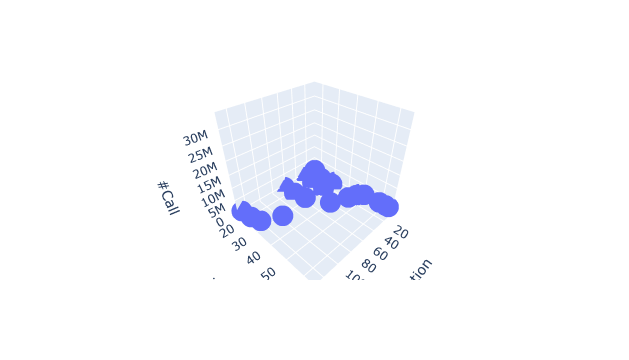

In [31]:
# Real_t_CalcElemVolume(const を3次元プロットする

import plotly.express as px

fig = px.scatter_3d(
    input_rawDF_train_CalcElemVolume, x="iteration", y="size", z="#Call"
)

fig.show()

In [34]:
input_rawDF_train_CalcElemVolume_with_plan: pd.DataFrame = (
    input_rawDF_train_CalcElemVolume
)
input_rawDF_train_CalcElemVolume_with_plan["plan"] = (
    input_rawDF_train_CalcElemVolume_with_plan["iteration"]
    * input_rawDF_train_CalcElemVolume_with_plan["size"]
    * input_rawDF_train_CalcElemVolume_with_plan["size"]
    * input_rawDF_train_CalcElemVolume_with_plan["size"]
)

input_rawDF_train_CalcElemVolume_with_plan["relative_error_rate"] = (
    100
    * abs(
        input_rawDF_train_CalcElemVolume_with_plan["#Call"]
        - input_rawDF_train_CalcElemVolume_with_plan["plan"]
    )
    / input_rawDF_train_CalcElemVolume_with_plan["#Call"]
)

input_rawDF_train_CalcElemVolume_with_plan.mean(axis="index")

/tmp/ipykernel_268/3682065846.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_268/3682065846.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_268/3682065846.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



#Call                  4.285055e+06
process                1.305000e+02
iteration              4.960000e+01
size                   3.680000e+01
plan                   4.200366e+06
relative_error_rate    4.467501e+00
dtype: float64

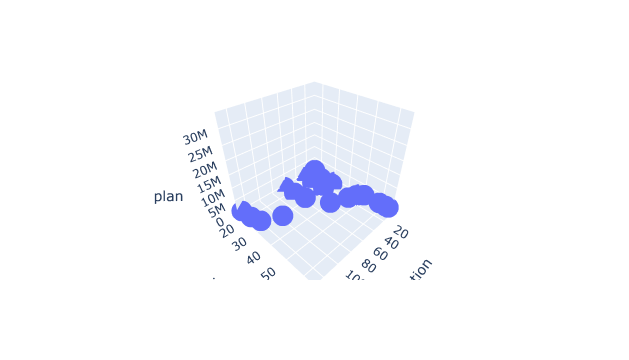

In [33]:
fig = px.scatter_3d(
    input_rawDF_train_CalcElemVolume_with_plan, x="iteration", y="size", z="plan"
)

fig.show()

In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello


In [ ]:
%reset -f

# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 生データの入ったCSVファイルの保持されたディレクトリ名を格納している変数
csvDirPath = "./csv_files/"

# NPBのベンチマーク名のリスト
benchmarkNames = ["cg", "ep", "ft", "is", "lu", "mg"]

# LULESH ベンチマークプログラムのプロセス数・問題サイズ・イテレーション数
lulesh_processes: list[int] = [8, 27, 64, 125, 216, 343, 512]
lulesh_iterations: list[int] = [8, 16, 32, 64, 128, 256]
lulesh_sizes: list[int] = [16, 24, 32, 48, 64, 128]

DEBUG:__main__:hello
